
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you so much for your diligence! This is a hard topic, but everything is great in your project! You can find my new comments with digit 2. I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi, George! I am a reviewer on this project. Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> you did a great job here, thank you so much! Actually the project is almost perfect. 
    
    
- You have successfully prepared the subsets;    
    
    
- Compared several algorithms on imbalanced data; 

    
- Initialized and correctly used resampling functions; 


- Analyzed metrics;


- Wrote an great conclusion! 



There're just a couple of issues that need your attention. Would you take a look at my comments? It should not take much time. I've also left some recommendations for improving the project. 

    

</div>

# Introduction

### Beta Bank is facing a gradual loss of customers, with a small portion leaving each month. After assessing the situation, the bank determined that retaining existing customers is more cost-effective than acquiring new ones. To address this issue, the bank seeks a predictive model that can identify which customers are likely to leave in the near future. This project aims to build a machine learning model that predicts customer churn based on historical data. The objective is to achieve the highest possible F1 score, with a minimum requirement of 0.59 for the test set. In addition to optimizing the F1 score, we will measure the AUC-ROC metric and compare it to the F1 score to gain further insight into the model’s performance.



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Try to make it broader next time :) For instance, you can add a short data description. 

</div>

## Preparing the Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
bank_data = pd.read_csv('/datasets/Churn.csv') # Load Dataset

In [3]:
bank_data.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
bank_data.shape

(10000, 14)

In [6]:
bank_data_duplicates = bank_data.duplicated().sum()
bank_data_duplicates # Check for duplicates

0

In [7]:
duplicate_ids = bank_data['CustomerId'].duplicated().sum() 
duplicate_ids # Checking for duplicates in the CustomerId column

0

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

    
Are there any duplicates in `CustomerId` column? 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Good! 

</div>

In [8]:
missing_values = bank_data.isnull().sum() # Check for null values
missing_values

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [9]:
tenure_median = bank_data['Tenure'].median() # Replacing null values with the median 
bank_data['Tenure'].fillna(tenure_median, inplace=True)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Good. You can call the `median` method inside the `fillna`. In addition, you can also fill in the gaps with a new value thus introducing a new "category". 
    
</div>

In [10]:
bank_data.isnull().sum() # Re-checking to make sure all null values in tenure column are now replaced

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
 # Removing unecessary columns for model training
bank_data = bank_data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Yes, we can drop them, since they do not influence the behavior. 
    
</div>

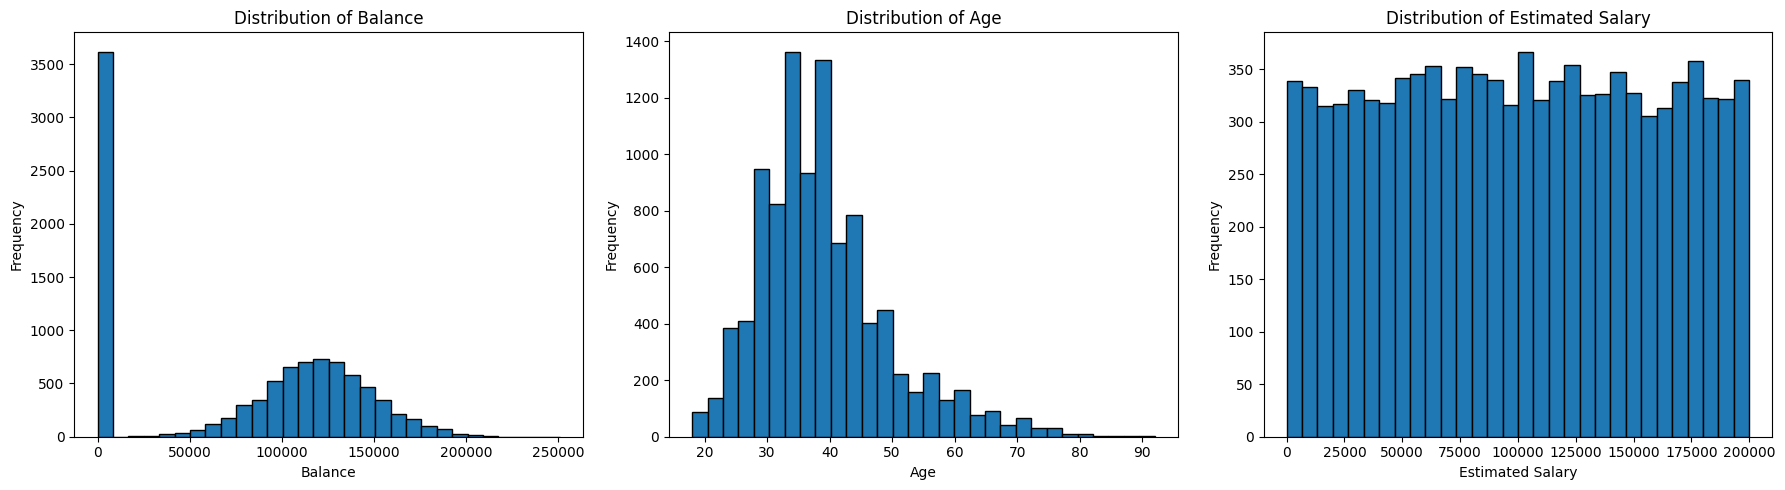

In [12]:
# Creating subplots to plot Balance, Age, and EstimatedSalary distributions
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plotting Balance distribution
axs[0].hist(bank_data['Balance'], bins=30, edgecolor='black')
axs[0].set_title('Distribution of Balance')
axs[0].set_xlabel('Balance')
axs[0].set_ylabel('Frequency')

# Plotting Age distribution
axs[1].hist(bank_data['Age'], bins=30, edgecolor='black')
axs[1].set_title('Distribution of Age')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')

# Plotting EstimatedSalary distribution
axs[2].hist(bank_data['EstimatedSalary'], bins=30, edgecolor='black')
axs[2].set_title('Distribution of Estimated Salary')
axs[2].set_xlabel('Estimated Salary')
axs[2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


In [13]:
# Defined the lower and upper ranges based on the IQR method
Q1 = bank_data[['Balance', 'Age', 'EstimatedSalary']].quantile(0.25)
Q3 = bank_data[['Balance', 'Age', 'EstimatedSalary']].quantile(0.75)
IQR = Q3 - Q1

# Calculated the number of outliers using the formula Q1-1.5xIQR and Q3+1.5xIQR
outliers = ((bank_data[['Balance', 'Age', 'EstimatedSalary']] < (Q1 - 1.5 * IQR)) | (bank_data[['Balance', 'Age', 'EstimatedSalary']] > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected in each column:\n", outliers)

Outliers detected in each column:
 Balance              0
Age                359
EstimatedSalary      0
dtype: int64


Here we can see that the Age column has some outliers. This might be due to some ages having different needs than the majority. We can cap the age limits in the data from 18-90 years old to allow the model to focus on the core age groups. We can also see a major spike in the Balance column at zero but without outliers , this should be investigated further.

In [14]:
# Capping the age column to ages between 18 and 90
bank_data['Age'] = np.where(bank_data['Age'] < 18, 18, bank_data['Age'])
bank_data['Age'] = np.where(bank_data['Age'] > 90, 90, bank_data['Age'])

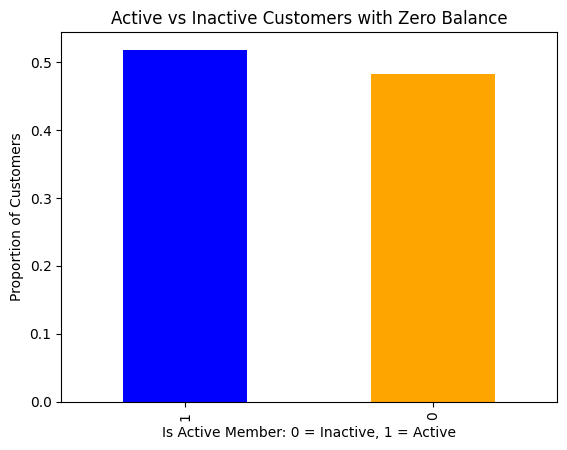

In [15]:
# Investigating zero-balance accounts
zero_balance_accounts = bank_data[bank_data['Balance'] == 0]

# Checking if zero-balance accounts are associated with inactive customers
inactive_zero_balance = zero_balance_accounts['IsActiveMember'].value_counts(normalize=True)

# Plotting the results for better visual
inactive_zero_balance.plot(kind='bar', color=['blue', 'orange'])
plt.title('Active vs Inactive Customers with Zero Balance')
plt.xlabel('Is Active Member: 0 = Inactive, 1 = Active')
plt.ylabel('Proportion of Customers')
plt.show()

 A large number of outliers are detected in the Age column, likely representing very young or old customers, who might behave differently compared to the average customer. I capped the age column to ages between 18-90 in order to remove possible outliers. There were no outliers in the Estimated Salary or Balance columns but we can see a huge spike in the Balance column at zero. This could be due to closed accounts, but upon analyzing the zero balance accounts, I found that over half are still active. This could mean many things such as, users having multiple accounts or even just temporarily being at zero after a transaction.

In [16]:
# Encoding for categorical features 
bank_data_encoded = pd.get_dummies(bank_data, columns=['Geography', 'Gender'], drop_first=True)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
For machine learning, `OneHotEncoder` is much better than `get_dummies`, so I recommend using it in the next projects :) 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Before we move on to the machine learning models, let's display some charts to evaluate the distributions of different columns we have. For instance, do `Balance`, `Age`, `Salary` columns look normal? Do they have any outliers? Don't forget to add titles and axes labels so that a reader can easily understand what's going on here. Conclusions are also important :)
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Excellent EDA! 
</div>

In [17]:
bank_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [18]:
# Splitting data into features and target
features = bank_data_encoded.drop('Exited', axis=1)
target = bank_data_encoded['Exited']


In [19]:
# Splitting the dataset into training, validation, and testing sets 
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.25, random_state=12345)
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
   

Correct. By the way, there's the `stratify` parameter that helps us ensure the random split saves the initial proportion of values in some column.   
    
</div>

In [20]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
# Scaling features for model training
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
display(features_train.head(5))

/tmp/ipykernel_188/3169372233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,-0.134048,-0.078048,-0.369113,0.076163,2,0,1,0.331571,0,0,0
6655,-1.010798,0.494666,-0.007415,0.136391,1,1,1,-0.727858,0,0,1
4287,0.639554,1.353736,-1.454209,0.358435,1,1,1,-0.477006,1,0,1
42,-0.990168,2.117355,-1.092511,0.651725,1,1,1,-0.100232,0,0,0
8178,0.567351,0.685570,0.715982,0.813110,2,1,1,0.801922,0,0,0


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>  Reviewer's comment </b>
    

Try to use **display** instead of **print** for the dataframes :) 


Display is a great thing. However, jupyter notebook is an interactive environment that already includes display. When we call a dataframe (see the code below), jupyter prints this dataframe like we do with the display method:

</div>

In [21]:
# Reviewer's code

display(features_train.head(3))

features_train.tail(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,-0.134048,-0.078048,-0.369113,0.076163,2,0,1,0.331571,0,0,0
6655,-1.010798,0.494666,-0.007415,0.136391,1,1,1,-0.727858,0,0,1
4287,0.639554,1.353736,-1.454209,0.358435,1,1,1,-0.477006,1,0,1


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1408,0.567351,-0.650762,1.439380,-1.232442,2,0,0,-1.202257,0,0,1
7661,-0.412545,0.494666,-1.092511,0.615524,1,1,1,-0.038931,1,0,1
3295,1.052142,-1.891642,1.439380,-1.232442,1,1,0,1.560932,0,1,0


<div class="alert alert-block alert-info">
    Great to know. Thank you! Also wanted to ask, for the introduction or general conclusions whats the best way to show them, should they be headers or just left as plain text?

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Plain text looks better. We usually use headers for titles.
</div>

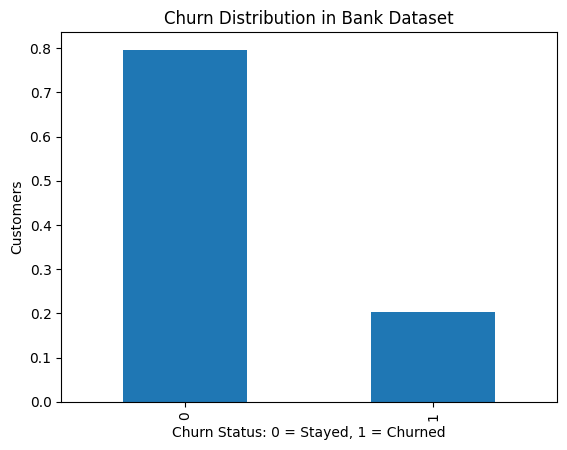

In [22]:
# Examining the balance of classes
bank_data['Exited'].value_counts(normalize=True).plot(kind='bar')

plt.title('Churn Distribution in Bank Dataset')
plt.xlabel('Churn Status: 0 = Stayed, 1 = Churned')
plt.ylabel('Customers')
plt.show()

Beta Bank seems to have a large retention rate at around 80% but a 20% churn rate should not be ignored. This distribution does infact tells us that people are leaving and further analysis will help figure out how to stop existing customers from leaving in the future.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

    
Would you add a conclusion? What can you say about the distribution? 
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Correct. 
</div>

In [23]:
# Defining models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [24]:
# Looping through each model, training it, and evaluating the performance
for model_name, model in models.items():
    # Train the model
    model.fit(features_train, target_train)
    
    # Predictions
    target_pred = model.predict(features_valid)
    
    # Evaluate the model using classification report and F1 score
    report = classification_report(target_valid, target_pred)
    f1 = f1_score(target_valid, target_pred)
    
  
    print(f"Model: {model_name}")
    print("Classification Report:\n", report)
    print(f"F1 Score: {f1}")
    print("-"*50)

Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1609
           1       0.57      0.20      0.30       391

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000

F1 Score: 0.30131826741996237
--------------------------------------------------
Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1609
           1       0.74      0.46      0.57       391

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

F1 Score: 0.5650793650793651
--------------------------------------------------
Model: Decision Tree
Classification Report:
               precision    recall  f1-score 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

Please do not use test subset, use validation instead. We should save test for the final test in the very end of the project after we identify the best model. We use validation to tune hyperparameters and estimate the F1 score. Based on these F1 score values, we choose the best model and then conduct the final test.    
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Correct! 
</div>

<div class="alert alert-block alert-info">
 Changed to valid test

### The Random Forest model achieved the highest F1 score, it indicates that this model is best at balancing precision and recall, making it the most effective at handling both false positives and false negatives in this dataset. Since the projects goal to reach a f1 score of atleast 0.59 was still not acheived, we must balance the classes using upsampling and downsampling.

In [25]:
def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
      # Calculate the repeat factor based on the imbalance
    repeat = target_zeros.shape[0] // target_ones.shape[0]
    
    # Upsample the minority class
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
      # Shuffling the data to avoid ordering bias
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

# Usage example
features_upsampled, target_upsampled = upsample(features_train, target_train)

print(features_upsampled.shape)
print(target_upsampled.shape)
print(target_upsampled.value_counts() / target_upsampled.shape[0])


(8438, 11)
(8438,)
0    0.566603
1    0.433397
Name: Exited, dtype: float64


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Correct. We indeed should apply resampling on training data only. 
    


By the way, there are other (actually even more preferable) resampling tools [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) or [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html). They may be a better choice when we use cross-validation (you will learn it in the next sprints), since cross-validation used with the resampling made by function from our lectures that you used above may cause data leakage. 

</div>

In [26]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
   
     # Using the passed fraction argument for sampling
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

     # Shuffling the data
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

# Usage example with specified fraction
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25
)

print(features_downsampled.shape)
print(target_downsampled.shape)
print(target_downsampled.value_counts() / target_downsampled.shape[0])


(2414, 11)
(2414,)
1    0.504971
0    0.495029
Name: Exited, dtype: float64


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

Downsampling function is not even used.     
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Now it is used :)
</div>

In [27]:
# Hyperparameters to tune
n_estimators_options = [50, 100]
max_depth_options = [10, 20]

# Store results
results = []

# List of resampling methods
resampling_methods = [
    ('upsample', features_upsampled, target_upsampled),
    ('downsample', features_downsampled, target_downsampled)
]

# Looping through each resampling method
for method_name, features_resampled, target_resampled in resampling_methods:
    
    # Looping through hyperparameter combinations
    for n_estimators in n_estimators_options:
        for max_depth in max_depth_options:
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)

            # Training the model on the resampled data 
            model.fit(features_resampled, target_resampled)
            
            # Predicting the validation set
            predictions_valid = model.predict(features_valid)
            f1_valid = f1_score(target_valid, predictions_valid)
            
            # Calculating probabilities and AUC-ROC score
            pred_proba_valid = model.predict_proba(features_valid)
            proba_one_valid = pred_proba_valid[:, 1]
            roc_auc_valid = roc_auc_score(target_valid, proba_one_valid)
            results.append({
                'Method': method_name,
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'F1 Score': f1_valid,
                'AUC-ROC': roc_auc_valid
            })

            
            print(f'Method: {method_name}, n_estimators: {n_estimators}, max_depth: {max_depth}')
            print(f'F1 Score: {f1_valid}, AUC-ROC: {roc_auc_valid}')
            print('-' * 50)


Method: upsample, n_estimators: 50, max_depth: 10
F1 Score: 0.6007509386733417, AUC-ROC: 0.8491128069570303
--------------------------------------------------
Method: upsample, n_estimators: 50, max_depth: 20
F1 Score: 0.5897079276773295, AUC-ROC: 0.8378772537469066
--------------------------------------------------
Method: upsample, n_estimators: 100, max_depth: 10
F1 Score: 0.5876543209876544, AUC-ROC: 0.8501618930599775
--------------------------------------------------
Method: upsample, n_estimators: 100, max_depth: 20
F1 Score: 0.588235294117647, AUC-ROC: 0.8412526088069188
--------------------------------------------------
Method: downsample, n_estimators: 50, max_depth: 10
F1 Score: 0.555984555984556, AUC-ROC: 0.8424185249531488
--------------------------------------------------
Method: downsample, n_estimators: 50, max_depth: 20
F1 Score: 0.5528612997090203, AUC-ROC: 0.8430352604197298
--------------------------------------------------
Method: downsample, n_estimators: 100, max

 Upsampling is typically the better choice when working with imbalanced datasets like customer churn prediction. It allows you to preserve all your data, train a more balanced model, and avoid the risk of losing important patterns from the majority class.  The best outcome was the upsampled data with the n_estimators=50 and the max_depth=10 hyperparameters. Next I will train the Random Forest model with the upsampled data on the test set for final testing.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

It may be a good idea to try all algorithms.    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

- According to the task, we have to compare at least two class imbalance handling techniques.     



- We also need to tune hyperparameters. Would you please do that? If you decide to implement it on the resampled data, please use a loop, not `GridSearch`. </div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Very good, thank you so much! 
</div>

## Final Testing

In [28]:
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=12345) 

# Assess the test set
model.fit(features_upsampled, target_upsampled) 
predictions_test = model.predict(features_test) 
f1_test = f1_score(target_test, predictions_test)

pred_proba_test = model.predict_proba(features_test)
proba_one_test = pred_proba_test[:, 1]
roc_auc_test = roc_auc_score(target_test, proba_one_test)

print('Test Set:')
print('F1:', f1_test)
print('AUC-ROC:', roc_auc_test)

Test Set:
F1: 0.6426076833527358
AUC-ROC: 0.8644053413054904


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Nice result! 
</div>

In [29]:
# Checking the precision and recall scores as well as creating a confusion matrix
precision_test = precision_score(target_test, predictions_test)
recall_test = recall_score(target_test, predictions_test)

print('Precision:', precision_test)
print('Recall:', recall_test)
print('Confusion Matrix:')
print(confusion_matrix(target_test, predictions_test))
print('Classification Report (Test Set):')
print(classification_report(target_test, predictions_test))

Precision: 0.6388888888888888
Recall: 0.6463700234192038
Confusion Matrix:
[[1417  156]
 [ 151  276]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1573
           1       0.64      0.65      0.64       427

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



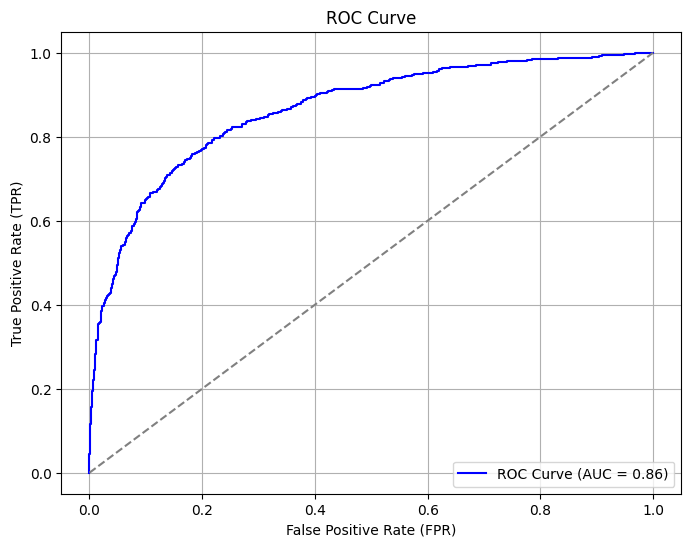

In [30]:
# Creating the roc_curve on the test set
fpr, tpr, thresholds = roc_curve(target_test, proba_one_test)

# Plotting the roc_curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
   

Nice results! </div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>  Reviewer's comment </b>
   

You can also display roc curve.     
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Great! 
</div>

## Conclusion

 ### In this project, the primary objective was to build a predictive model to help Beta Bank identify customers who are likely to churn. By analyzing customer data and developing machine learning models, I aimed to create an effective solution that would enable the bank to retain valuable customers. During the model comparison process, I tested various algorithms, including Logistic Regression and Decision Tree. While these models provided valuable insights, Random Forest emerged as the most effective model, outperforming the others in terms of both F1 score and AUC-ROC. With an f1 score of 0.64 we surpassed the projects expectation of 0.59. From leveraging the Random Forest model and acting on the predictions, Beta Bank can reduce customer churn rates, leading to increased customer retention and long-term profitability.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
The conclusion is written well.    
</div>    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

    
You can make it a little broader and add more info about different models you compared. 

</div>  
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Don't forget to update it if needed. 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Excellent job! 
</div>